In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

In [41]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data (1).csv


In [42]:
import io
df = pd.read_csv(io.BytesIO(uploaded['car data.csv']))

In [43]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
#Finding out different categories of categorical data

In [45]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [46]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [47]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [48]:
df['Owner'].unique()

array([0, 1, 3])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [51]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [52]:
#So clearly that doesn't indicate good further on our dataset
df.drop(['Car_Name'],axis=1,inplace=True)

In [53]:
df['Curr_Year']=2021

In [54]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Curr_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [55]:
#Getting how much years this car is old
df['o_Year']=df['Curr_Year']-df['Year']

In [56]:
df.drop(['Year','Curr_Year'],axis=1,inplace=True)

In [57]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,o_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [58]:
#Converting all of the dataset to one-hot encoded
data=pd.get_dummies(df,drop_first=True)#drop first is used for deleting first column to prevent dummy variable track
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,o_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


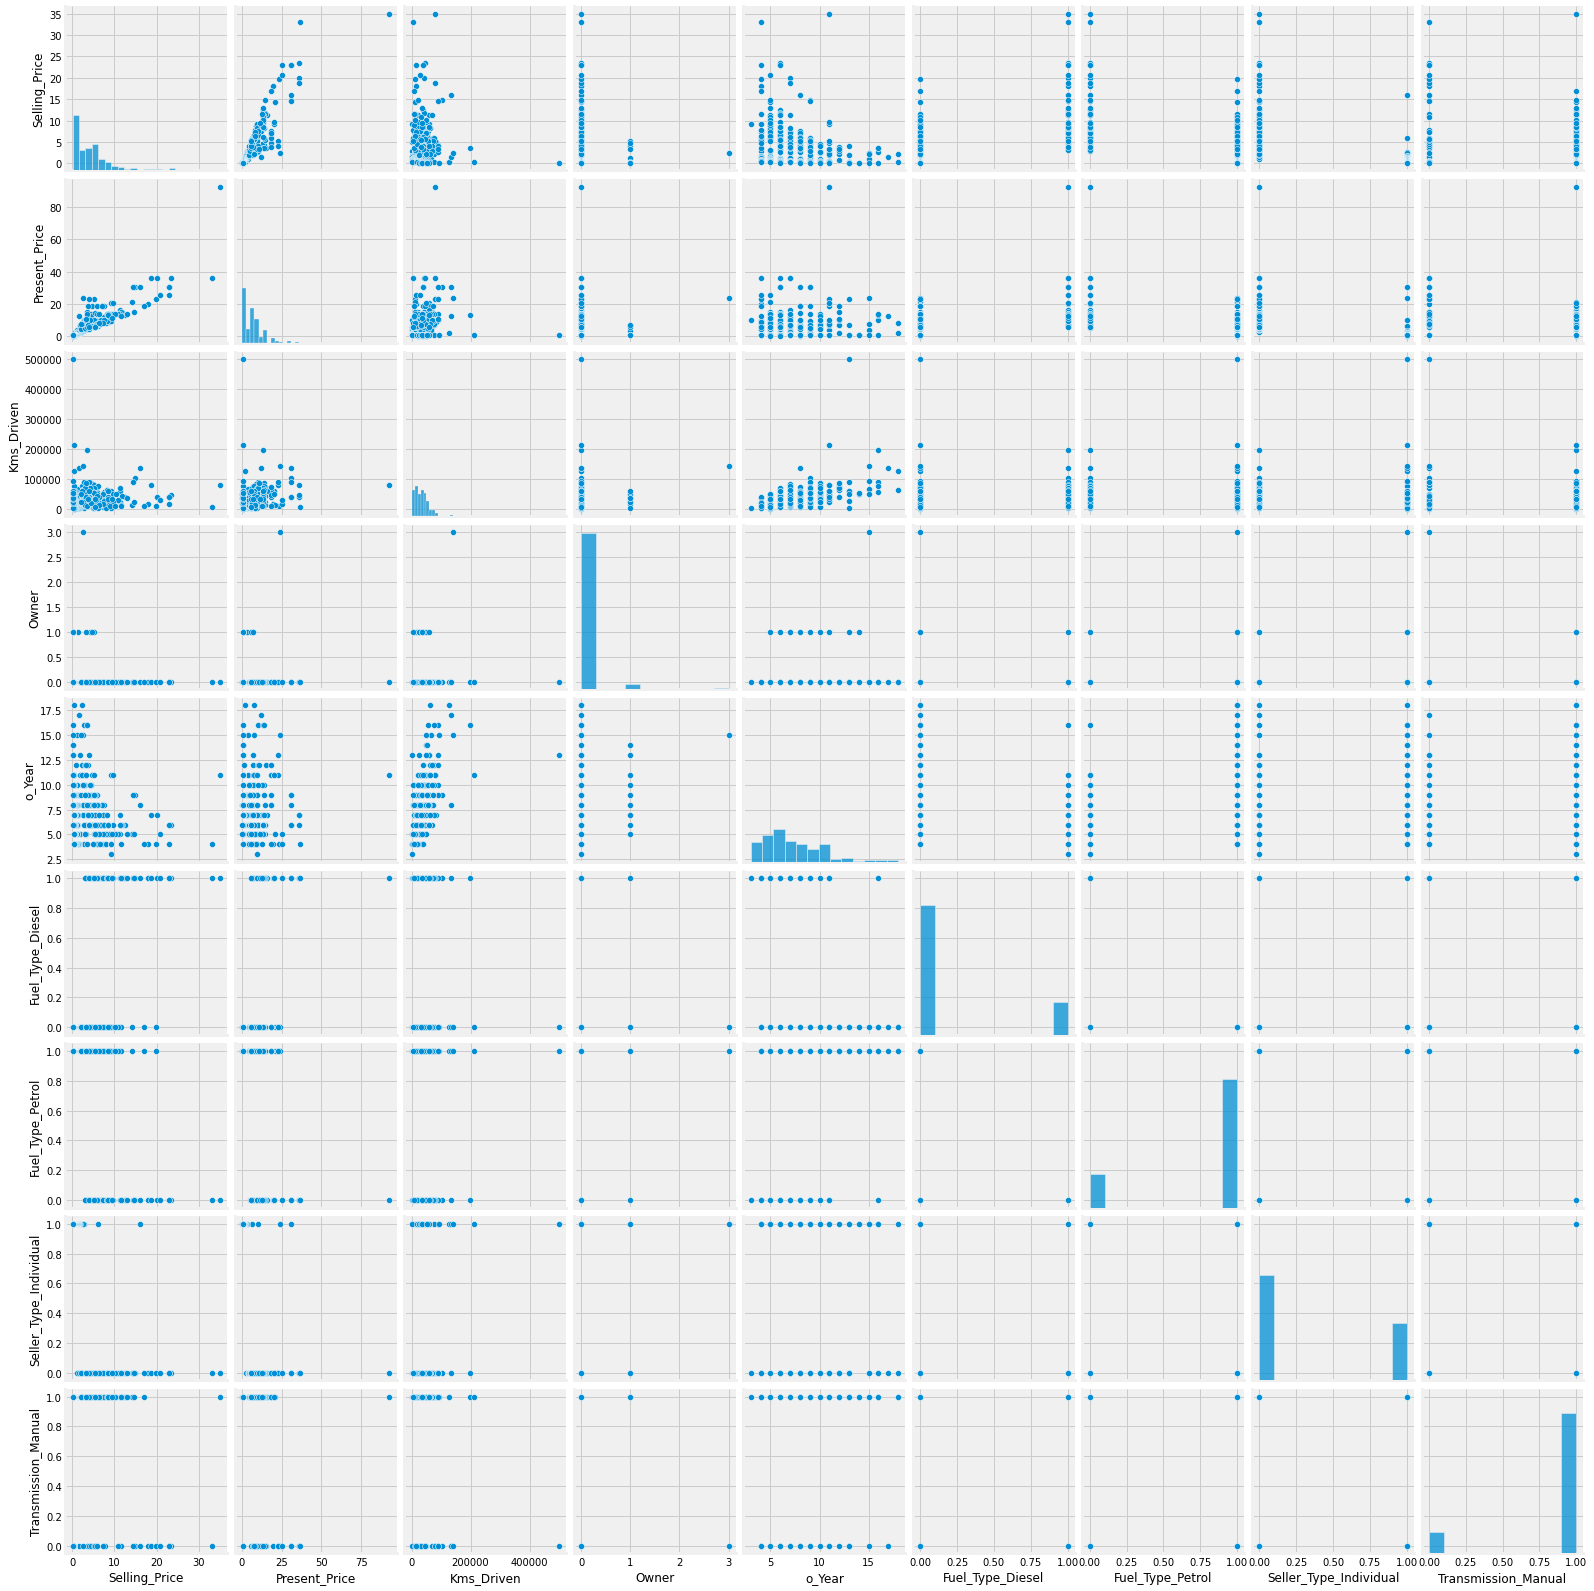

In [59]:
sns.pairplot(data)

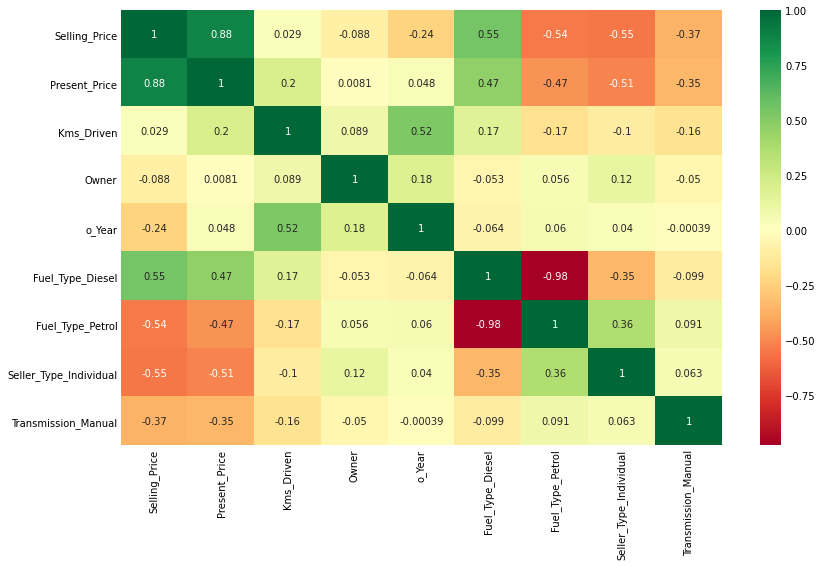

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)

In [61]:
X=data.iloc[:,1:]
y=df['Selling_Price']

In [62]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor#using regressor because it is a regression problem it picks and enumerates important features for us
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [63]:
print(model.feature_importances_)

[0.37023271 0.03966031 0.00087703 0.07331345 0.23834409 0.00793312
 0.12466359 0.14497569]


In [64]:
print(X.columns)

Index(['Present_Price', 'Kms_Driven', 'Owner', 'o_Year', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')


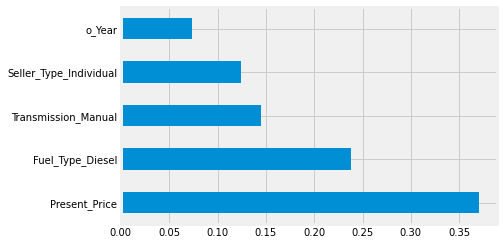

In [65]:
#plotting graph for better visualization of feature importance
feat=pd.Series(model.feature_importances_,index=X.columns)
feat.nlargest(5).plot(kind='barh')#printing top 5 largest feature importances
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=37,shuffle=True)

In [67]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(270, 8) (270,)
(31, 8) (31,)


**Linear Regression**

In [68]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
# regression coefficients
print('Coefficients: ', linear.coef_)

Coefficients:  [ 4.31117956e-01 -7.69636838e-06 -7.69622105e-01 -3.80949242e-01
  2.45956945e+00  6.31457777e-01 -1.16611118e+00 -1.52836633e+00]


In [70]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(linear.score(X_test, y_test)))

Variance score: 0.8579196719011964


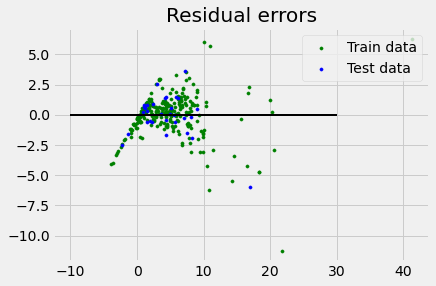

In [71]:
## setting plot style
plt.style.use('fivethirtyeight')
plt.scatter(linear.predict(X_train), linear.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')
plt.scatter(linear.predict(X_test), linear.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = -10, xmax = 30, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [72]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const                     5.239351
Present_Price             0.431118
Kms_Driven               -0.000008
Owner                    -0.769622
o_Year                   -0.380949
Fuel_Type_Diesel          2.459569
Fuel_Type_Petrol          0.631458
Seller_Type_Individual   -1.166111
Transmission_Manual      -1.528366
dtype: float64

In [73]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     249.7
Date:                Sun, 20 Jun 2021   Prob (F-statistic):          1.33e-117
Time:                        11:31:10   Log-Likelihood:                -533.85
No. Observations:                 270   AIC:                             1086.
Df Residuals:                     261   BIC:                             1118.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.2394      1.347      3.891      0.000       2.588       7.891
Present_Price              0.4311      0.016     26.377      0.000       0.399       0.463
Kms_Driven             -7.696e-06   3.47e-06     -2.219      0.027   -1.45e-05   -8.66e-07
Owner                     -0.7696      0.437     -1.761      0.079      -1.630       0.091
o_Year                    -0.3809      0.046     -8.266      0.000      -0.472      -0.290
Fuel_Type_Diesel           2.4596      1.289      1.908      0.057      -0.079       4.998
Fuel_Type_Petrol           0.6315      1.269      0.498      0.619      -1.867       3.130
Seller_Type_Individual    -1.1661      0.272     -4.292      0.000      -1.701      -0.631
Transmission_Manual       -1.5284      0.345     -4.429      0.000      -2.208      -0.849
==============================================================================
Omnibus:                       94.477   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.411
Skew:                           1.182   Prob(JB):                    9.98e-157
Kurtosis:                      10.634   Cond. No.                     1.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Random Forrest**

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [75]:
#Selecting different different hyperparameters for selecting best of
n_estimators=[int(x) for x in np.linspace(start=100,stop=1300,num=13)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300]


In [76]:
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [81]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=37, n_jobs = 1)

In [82]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.4s
[CV] n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.5s
[CV] n_estimators=1300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1300, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1300, min_samples_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   58.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [84]:
y_pred=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


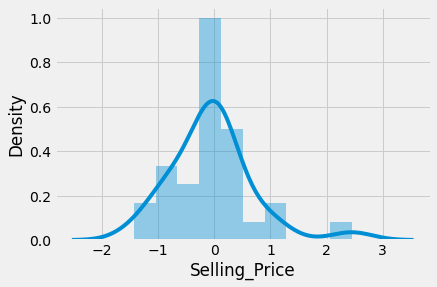

In [85]:
sns.distplot(y_test-y_pred)

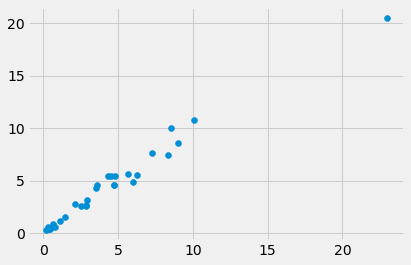

In [86]:
plt.scatter(y_test,y_pred)

In [83]:
rf_random.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [87]:
from sklearn import metrics

In [89]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4904934763310922
MSE: 0.520203197684723
RMSE: 0.7212511335760402


In [90]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)